In [1]:
import os

# 獲取當前工作目錄
current_path = os.getcwd()
print(current_path)


C:\Users\HP


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline
# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [4]:
#data pre

In [5]:
 categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [6]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [7]:
#tewnty_train as a python dictionaries
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [8]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [9]:
len(twenty_train.data)

2257

In [10]:
len(twenty_train.filenames)

2257

In [11]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [12]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [13]:
twenty_train.target[0]

1

In [14]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [15]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [16]:
#exercise 1: please print out the text data for the first three samples in the dataset.
#my ans
#用target來索引data, 不符合題目敘述要求
for t in twenty_train.target[:3]:
    print("\n".join(twenty_train.data[t].split("\n")))

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv domain, i.e  the mesh is a 
	mapping of a 3d Bezier patch into 2d. The area in this domain
	which is inside a trimming loop had to be rendered. The trimming
	loop is a set of 2d Bezier curve segments.
	For the sake of notation: the mesh is made up of cells.

	My problem is this :
	The trimming area has to be split up into individual smaller
	cells bounded by the trimming curve segments. If a cell
	is wholly inside the area...then it is output as a whole ,
	else it is trivially rejected. 

	Does any body know how thiss can be done, or is there any algo. 
	somewhere for doing this.

	Any help would be appreciated.

	Thanks, 
	Ani.
-- 
To get irritated is human, to stay cool, divi

In [17]:
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [18]:
#you can check helpers on TA's Github
#data transformation

In [19]:
import pandas as pd
# my functions
# 先將當前工作目錄更改為clone repo 位置
os.chdir('D://DM_lab1_repo//DM2024-Lab1-Master') 
import helpers.data_mining_helpers as dmh
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [20]:
len(X)
X[:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [21]:
for t in X["text"][:2]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [22]:
# add category to the dataframe
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [23]:
X[:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [24]:
# 多列query使用雙層bracket
X[:10][["text", "category"]]

text  category
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2

In [25]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [26]:
X.tail(10)

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [27]:
X.head(2)

text  category  category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics

In [28]:
# loc[], by label
X.loc[:10, "text"]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [29]:
# iloc[], by column position(in number)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [30]:
# exercise 2: Experiment with other querying techniques using pandas dataframes.

In [31]:
#method 1: boolean indexing
category_que = X[X["category"] > 1]
print(category_que[:3])

                                                text  category  \
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  


In [32]:
#method 2: query()
result = X.query('category > 1 and category_name == "sci.med"')
print(result[:3])

                                                text  category category_name
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2       sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2       sci.med


In [33]:
#method3: filter()
filtered_results = X.filter(like = "category")
print(filtered_results[:3])

   category           category_name
0         1           comp.graphics
1         1           comp.graphics
2         3  soc.religion.christian


In [34]:
# exercise 3: Try to fetch records belonging to the sci.med category, and query every 10th record. Only show the first 5 records.

In [35]:
#my ans
#題目應該是希望從category_name == "sci.med"的部分(from "records belonging to the sci.med category")以每10筆的方式檢索，並只顯示前五筆
#而我的先後順序是對所有的資料以每10筆的方式檢索，並且符合category_name == "sci.med"的條件

#注意[::10]這個 query method

# 生成一個 index 列表，包含每第十條記錄的索引
every_10th_index = X.index[::10]

# 使用 query 方法選擇這些記錄
every_10th_record = X.query('index in @every_10th_index and category_name == "sci.med"')
print(every_10th_record[:5])

                                                  text  category category_name
30   From: vgwlu@dunsell.calgary.chevron.com (greg ...         2       sci.med
80   From: annick@cortex.physiol.su.oz.au (Annick A...         2       sci.med
160  From: noring@netcom.com (Jon Noring) Subject: ...         2       sci.med
180  From: vonwaadn@kuhub.cc.ukans.edu Subject: Pan...         2       sci.med
220  From: ske@pkmab.se (Kristoffer Eriksson) Subje...         2       sci.med


In [36]:
#TA ans
print(X[X["category_name"] == "sci.med"].iloc[::10][:5])

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


In [37]:
# data minig using pandas

In [38]:
 # check missing values
 X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [39]:
 X.isnull().apply(lambda x: dmh.check_missing_values(x)) #which axis equals to zero

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [40]:
# exercise 4:  Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
# hint: axis parameter

#my ans
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [41]:
#add dummy record as missing value (to corrupt the dataset)

dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"]) 

In [42]:
dummy_series

text        dummy_record
category               1
dtype: object

In [43]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record        1

In [44]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [45]:
# check if the records was commited into result
len(result_with_series)

2258

In [46]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [47]:
 # dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

2258

In [48]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [49]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [50]:
len(X)

2257

In [51]:
# exercise 5: Please check the data and the process below, describe what you observe and why it happened.
# note: why .isnull() didn't work?

import numpy as np
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [52]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [53]:
#my ans

missing_value_D = NA_df.loc[NA_df['id'] == 'D', 'missing_example'].values[0]
print(type(missing_value_D))
#so are value C, F 

#epxlanation: 因為data C, D, F在 missing_example的數值是str, 並不是真正的python的None類型 

<class 'str'>


In [54]:
# duplicate data (might skew the analysis and affect data's integrity)

In [55]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [56]:
sum(X.duplicated())

0

In [57]:
sum(X.duplicated('text'))

0

In [58]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [59]:
len(X)

2259

In [60]:
sum(X.duplicated())

1

In [61]:
X.drop_duplicates(keep = False, inplace = True)
len(X)

2257

In [62]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [63]:
X_sample[:4]

text  category  \
1271  From: mangoe@cs.umd.edu (Charley Wingate) Subj...         0   
145   From: todamhyp@charles.unlv.edu (Brian M. Huey...         2   
397   From: David.Bernard@central.sun.com (Dave Bern...         3   
1361  From: robin@ntmtv.com (Robin Coutellier) Subje...         2   

               category_name  
1271             alt.atheism  
145                  sci.med  
397   soc.religion.christian  
1361                 sci.med

In [64]:
#exercise 6:  Notice any changes from the X dataframe to the X_sample dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

#my ans
#observations: 

# 1. The sequence of sample data records are different from X dataframe's.
# 2. The distribution of sample data might differ from the original one.
# 3. Note that there may be data missing in the data, and sampling might cause different ratio of data missing from the original one. (I suppose not only different data missing issue might happen, also the issue of duplicated data ratio.)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

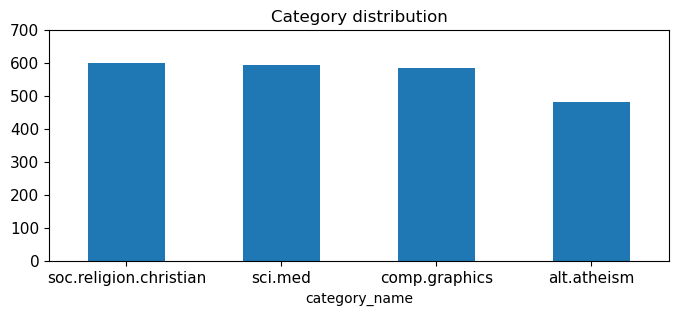

In [67]:
print(X.category_name.value_counts())
# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
sci.med                   285
soc.religion.christian    261
comp.graphics             230
alt.atheism               224
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

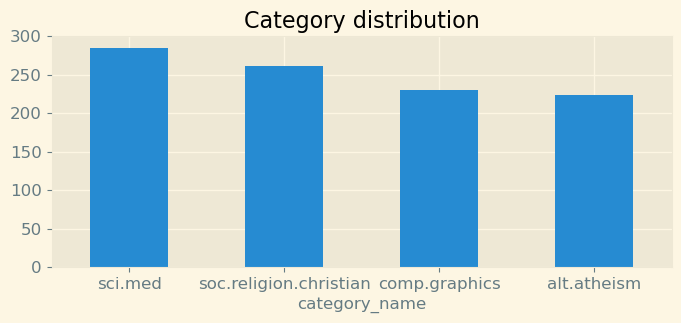

In [68]:
print(X_sample.category_name.value_counts())
plt.style.use("Solarize_Light2")
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [69]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Please input the limitation of ylim:  300


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

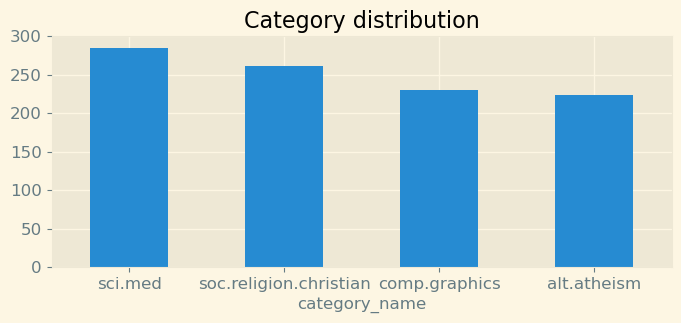

In [70]:
#exercise 7:  Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

#my ans
# not hardcoding it 是指希望能夠自動計算或獲取這個值，能自動更新，無需手動調整，非指input該數值

ylim_input = int(input("Please input the limitation of ylim: "))

# print(X_sample.category_name.value_counts())
plt.style.use("Solarize_Light2")
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, ylim_input], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

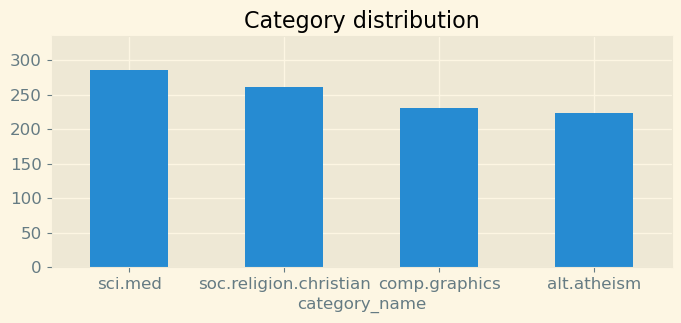

In [71]:
#TA ans

#find the potantial maximum value of ylim (and there might a gap of ylim saw on the figure, thus 50 (arbitrary, positive) was added.)
upper_bound = max(X_sample.category_name.value_counts() + 50)

plt.style.use("Solarize_Light2")
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

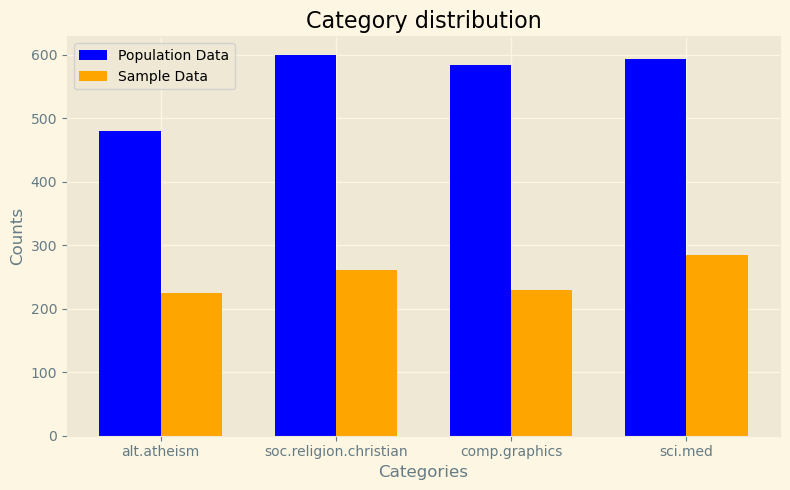

In [72]:
#exercise 8:  We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.


#my ans:

# 計算 X 和 X_sample 的類別分佈
X_counts = X.category_name.value_counts()
X_sample_counts = X_sample.category_name.value_counts()

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

X_counts = X_counts.reindex(categories).fillna(0)
X_sample_counts = X_sample_counts.reindex(categories).fillna(0)

bar_width = 0.35
index = np.arange(len(categories))

plt.style.use("Solarize_Light2")
fig, ax = plt.subplots(figsize=(8, 5))

bar1 = ax.bar(index, X_counts, bar_width, label='Population Data', color='blue')

bar2 = ax.bar(index + bar_width, X_sample_counts, bar_width, label='Sample Data', color='orange')

ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Category distribution')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)

ax.legend()

plt.tight_layout()
plt.show()

In [73]:
#feature creation
#here will be focusing on creaitng textual features
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [74]:
#extract unigram or single word from the text (using nltk or spaCy / scikitlearn to improve the result), which is to enrich the dataset with new feature
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [75]:
X[:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [76]:
X[:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [77]:
list(X[:1]["unigrams"])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [79]:
type(X)

pandas.core.frame.DataFrame

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
type(X)
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
type(X)
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73 stored elements and shape (1, 35788)>
  Coords	Values
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [81]:
count_vect.get_feature_names_out()[14]

'001125'

In [82]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)
#n-gram model

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [83]:
# exercise 9:  Let's analyze the first record of our X dataframe with the new analyzer we have just built.
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?

In [84]:
# TA ans
#analyze() 是用來解析文本的內部函數，返回的是經過預處理的詞彙或 n-grams 列表
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [85]:
#2257 documents & 35788 unique words in these documents
X_counts.shape

(2257, 35788)

In [86]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [87]:
#toarray()可以將特徵直接轉換為文本的特徵計數矩陣
dense_matrix = X_counts[0:5, 0:100].toarray()

In [88]:
# exercise 10: We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible

feature_names = count_vect.get_feature_names_out()

# my ans:
for doc_index, doc in enumerate(dense_matrix):
    print(f"\n文檔 {doc_index} 的出現詞彙:")
    for word_index, count in enumerate(doc):
        if count > 0:  # 找到矩陣中為 1 的值
            print(f"- {feature_names[word_index]}: 出現 {count} 次")


文檔 0 的出現詞彙:

文檔 1 的出現詞彙:

文檔 2 的出現詞彙:

文檔 3 的出現詞彙:

文檔 4 的出現詞彙:
- 00: 出現 1 次
- 01: 出現 1 次


In [89]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [90]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [91]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
# different ways of data mining(matplotlib / seaborn) 可以試試看用seaborn繪圖

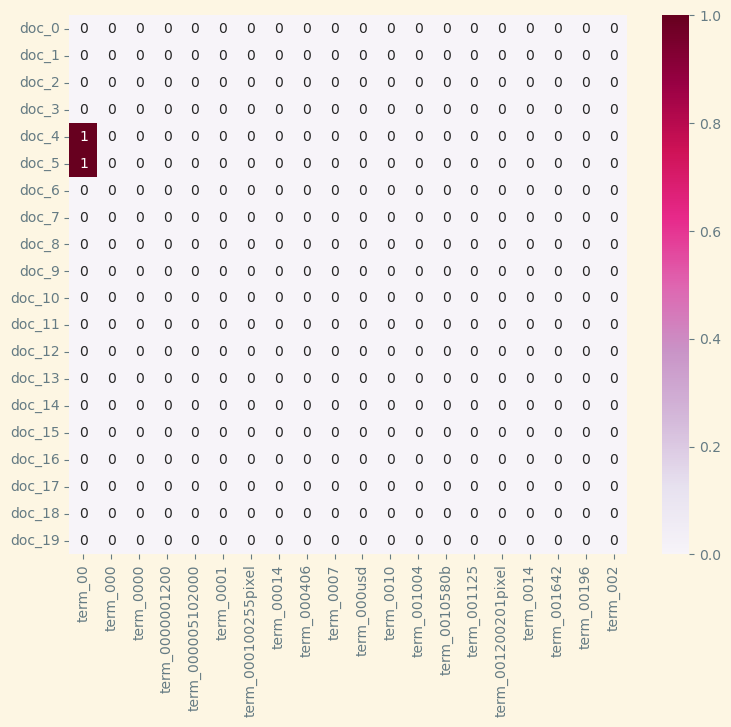

In [93]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [94]:
# exercise 11: From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with FREQUENCY of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization



C:\Users\HP\AppData\Local\Temp\ipykernel_12480\2400744266.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  indices = torch.tensor([coo.row, coo.col], dtype=torch.int64)
C:\Users\HP\AppData\Local\Temp\ipykernel_12480\2400744266.py:12: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:620.)
  torch_sparse_matrix = torch.sparse.FloatTensor(indices, values, torch.Size(coo.shape))


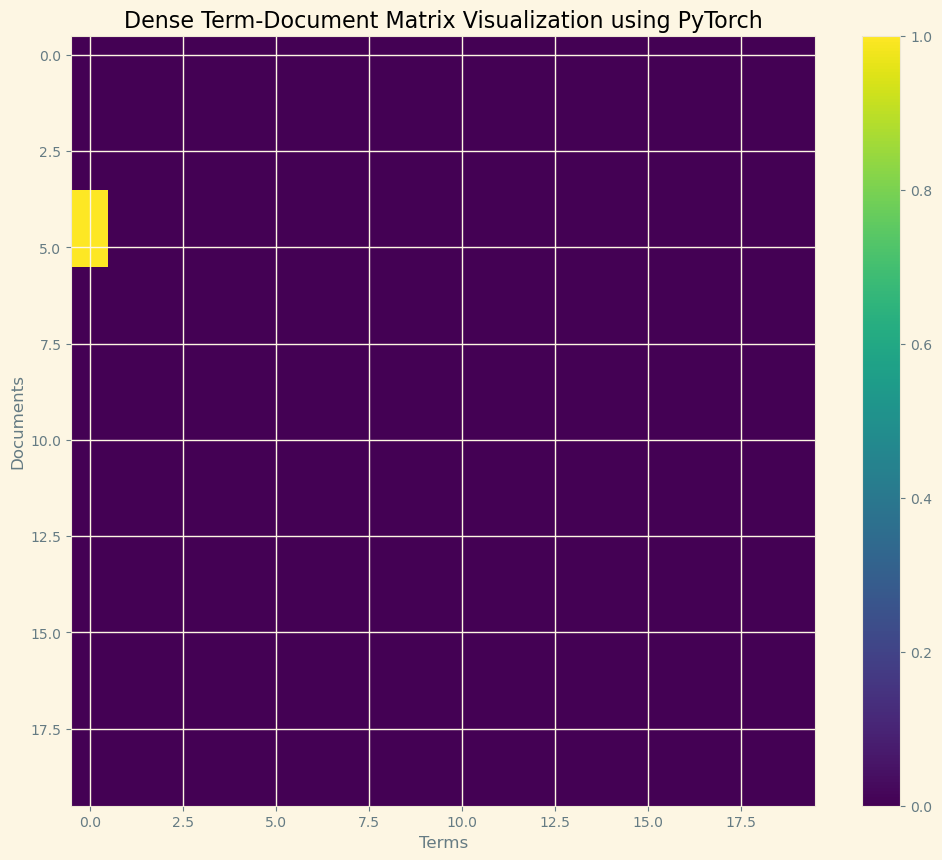

In [95]:
import torch
import numpy as np
from scipy.sparse import csr_matrix

# 假設 sparse_matrix 是一個 SciPy 的稀疏矩陣
sparse_matrix = csr_matrix(plot_z)  # 你的稀疏矩陣資料

# 將 SciPy 稀疏矩陣轉換為 PyTorch 稀疏張量
coo = sparse_matrix.tocoo()  # 轉為 COOrdinate 格式，方便提取 indices 和 values
values = torch.tensor(coo.data, dtype=torch.float32)
indices = torch.tensor([coo.row, coo.col], dtype=torch.int64)
torch_sparse_matrix = torch.sparse.FloatTensor(indices, values, torch.Size(coo.shape))

# 將 PyTorch 稀疏張量轉為密集張量
dense_matrix = torch_sparse_matrix.to_dense()

# 繪製轉換後的密集矩陣
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.imshow(dense_matrix.numpy(), cmap="viridis", aspect='auto')
plt.colorbar()
plt.title("Dense Term-Document Matrix Visualization using PyTorch")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

In [96]:
# Attribute Transformation / Aggregation

In [97]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [98]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [99]:
print(X_counts)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 365886 stored elements and shape (2257, 35788)>
  Coords	Values
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (2256, 13740)	1
  (2256, 14662)	1
  (2256, 20201)	1
  (2256, 12443)	6
  (2256, 30325)	3
  (2256, 4610)	1
  (2256, 33844)	1
  (2256, 17354)	1
  (2256, 26998)	1
  (2256, 20277)	1
  (2256, 20695)	1
  (2256, 20702)	1
  (2256, 9649)	1
  (2256, 9086)	1
  (2256, 26254)	1
  (2256, 17133)	2
  (2256, 4490)	1
  (2256, 13720)	1
  (2256, 5016)	1
  (2256, 9632)	1
  (2256, 11824)	1
  (2256, 29993)	1
  (2256, 1298)	1
  (2256, 2375)	1
  (2256, 3921)	1


In [100]:
print(term_frequencies)

[134  92   1 ...   1   1   1]


C:\Users\HP\AppData\Local\Temp\ipykernel_12480\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


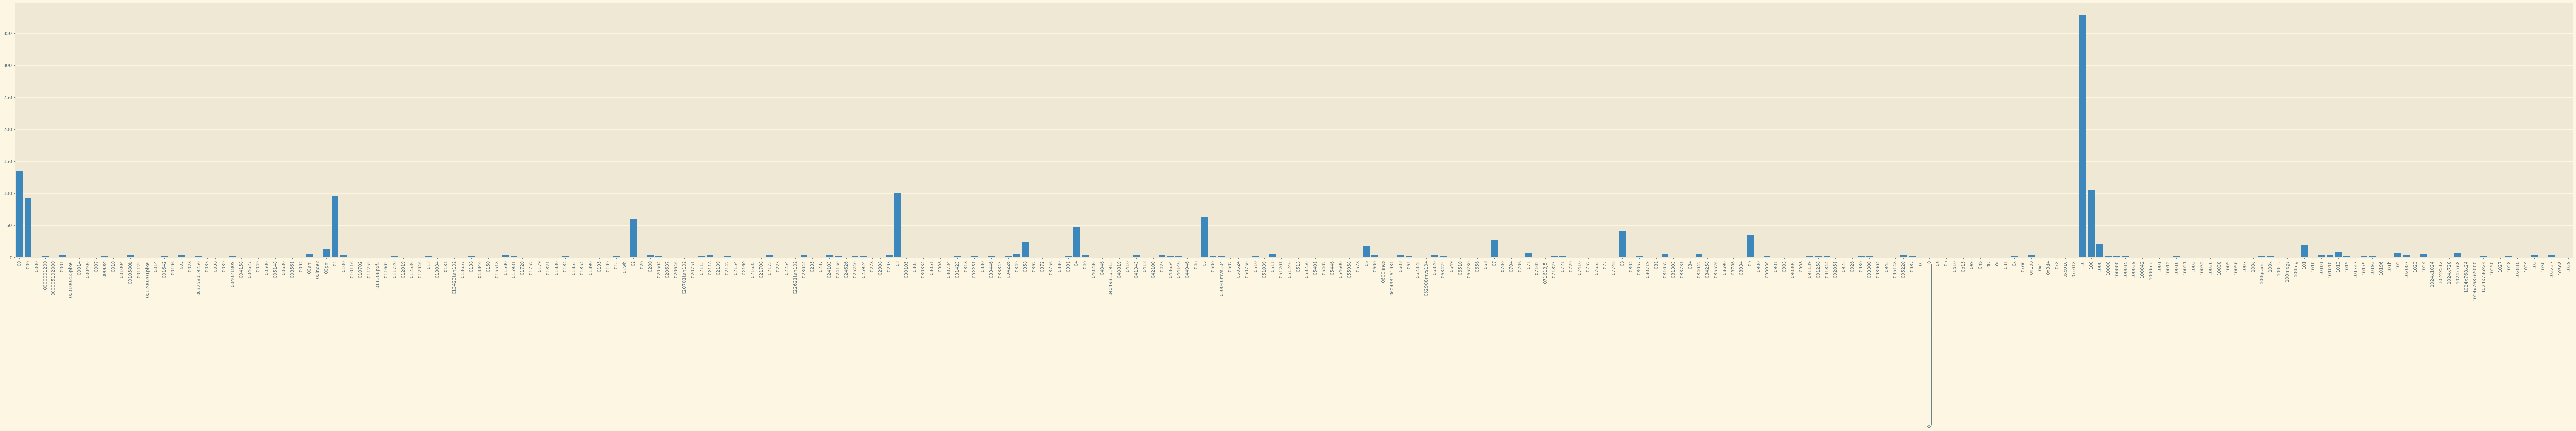

In [101]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [102]:
# exercise 12: use plotly to achieve attribute aggregation

# my ans

import plotly.graph_objects as go

# 聚合屬性 (這裡僅選擇前 300 個詞頻作為範例)
words = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# 使用 Plotly 繪製條形圖
fig = go.Figure(data=[
    go.Bar(x=words, y=frequencies)
])

# 設定圖形屬性
fig.update_layout(
    title="Term Frequencies (Top 300 Terms)",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=-90,
    width=1200,  # 調整圖寬以更好地顯示詞語
    height=600
)

# 顯示圖形
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12480\1254528736.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



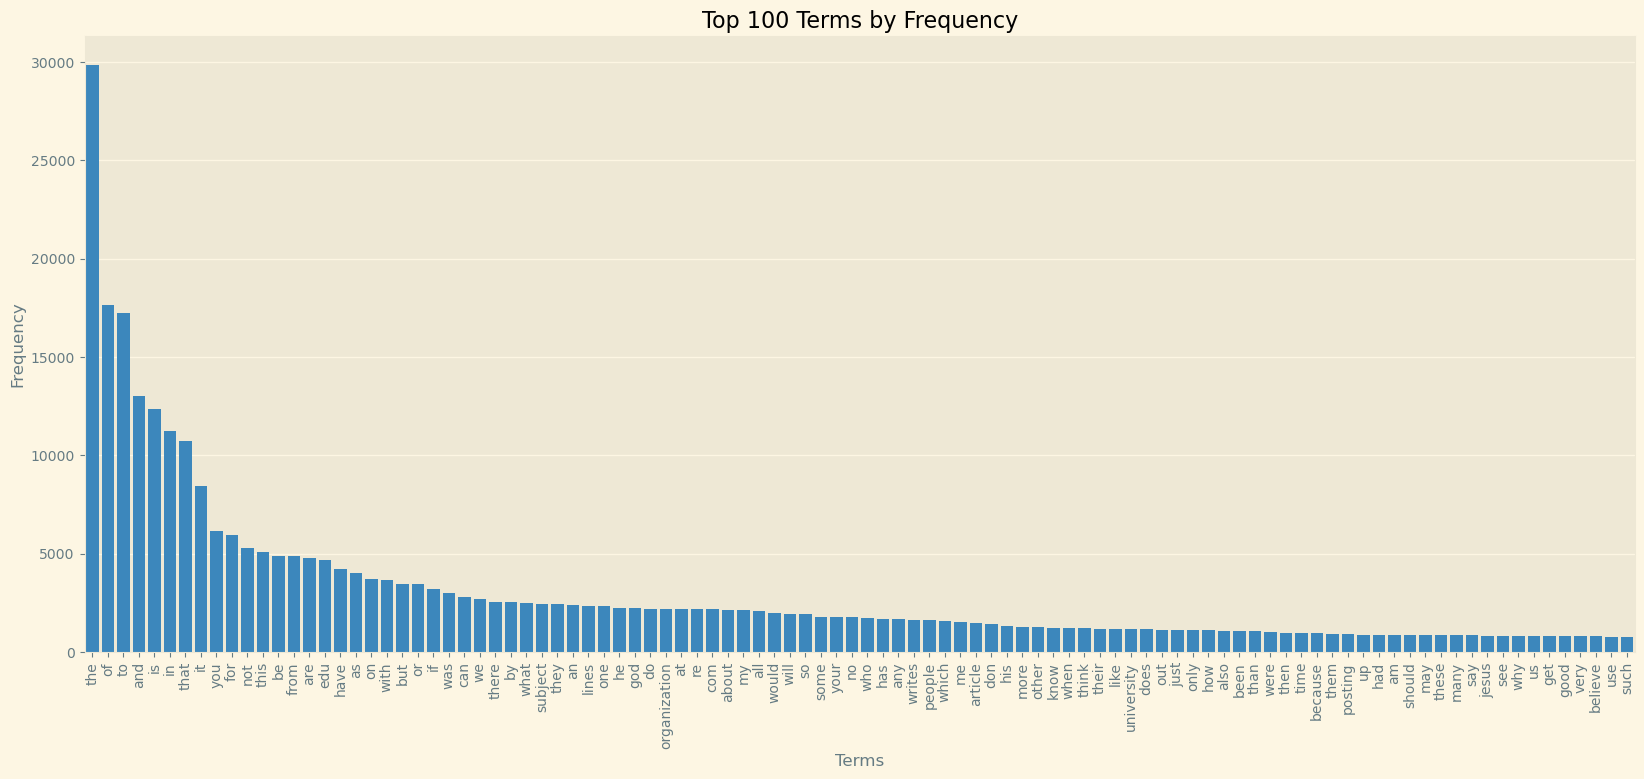

In [103]:
# exercise 13:  The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

# my ans:

import matplotlib.pyplot as plt
import seaborn as sns

# 選擇頻次最高的前 100 個詞
top_n = 100
top_indices = term_frequencies.argsort()[-top_n:][::-1]  # 取得頻次最高的索引
top_words = count_vect.get_feature_names_out()[top_indices]
top_frequencies = term_frequencies[top_indices]

# 繪製條形圖
plt.subplots(figsize=(20, 8))  # 調整圖形大小以適應較少的詞數
g = sns.barplot(x=top_words, y=top_frequencies)
g.set_xticklabels(top_words, rotation=90)
plt.title(f"Top {top_n} Terms by Frequency")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()

In [104]:
# exercise 14: Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail

# my ans (改為改善題12的結果)

import plotly.graph_objects as go

words = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# 對詞頻進行降序排序
sorted_indices = np.argsort(frequencies)[::-1]
sorted_words = words[sorted_indices]
sorted_frequencies = frequencies[sorted_indices]

fig = go.Figure(data=[
    go.Bar(x=sorted_words, y=sorted_frequencies)
])

# 設定圖形屬性
fig.update_layout(
    title="Term Frequencies (Top 300 Terms Sorted by Frequency)",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=-90,
    width=1200,  # 調整圖寬
    height=600
)

fig.show()

In [105]:
#log distribution
#可以靠調整frequencies來調整log scale
#下式使計算可以直接用for loop和array內完成
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\HP\AppData\Local\Temp\ipykernel_12480\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



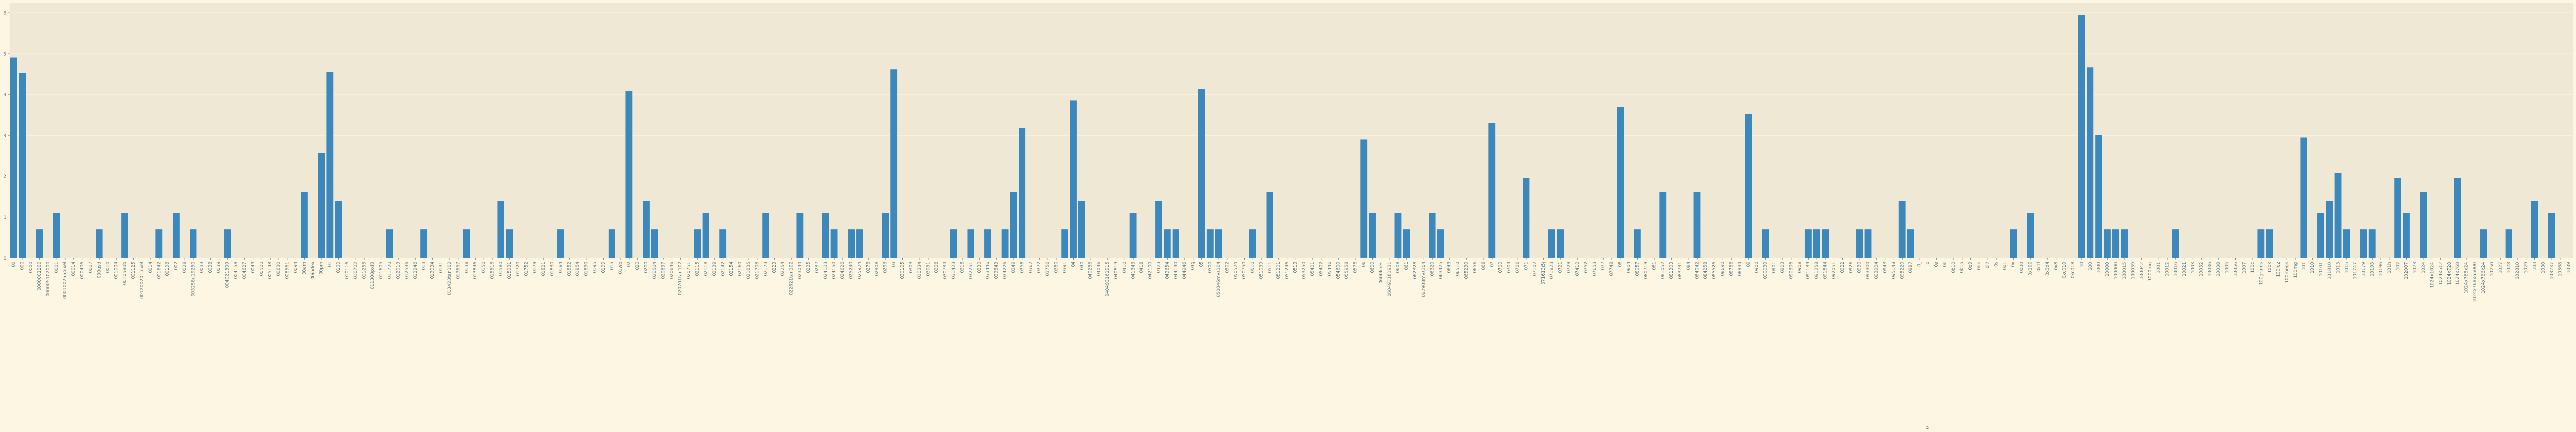

In [106]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\HP\AppData\Local\Temp\ipykernel_12480\2626548118.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



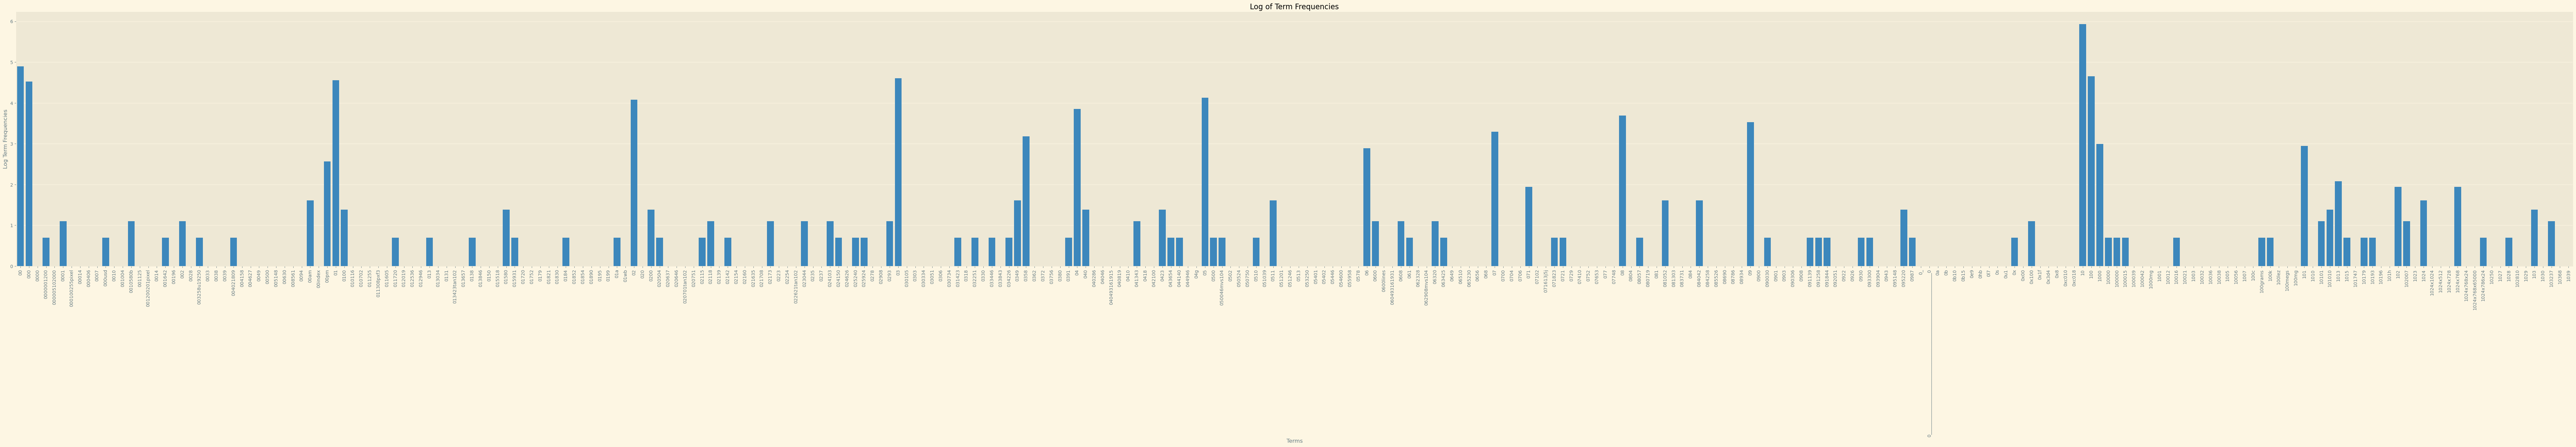

In [107]:
# exercise 15: You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

term_frequencies_log = [math.log(i) for i in term_frequencies if i > 0]  # 確保不取 log(0)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.title('Log of Term Frequencies')
plt.xlabel('Terms')
plt.ylabel('Log Term Frequencies')
plt.show()


In [109]:
# exercise 16:  Review the words that were filtered in each category and comment about the differences and similarities that you can see.

# my ans:
    # 差異:相較於沒有經過filtered的資料，經過filtered後明顯特徵數量將會減少，同時極端的詞語會被消除(例如 top 5%應該會有類似於"的", "是"等詞彙)
    # 相似: 即使移除極端出現的詞彙，但是基本的詞頻結構一樣有被保留下來，這些被保留下來的詞彙很可能是核心詞彙

In [150]:
# exercise 17: Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. Only implement the mining part of the algorithm and display the resulting patterns, like we did with
# the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these
# settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance

In [134]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime()))

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime()))

obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime()))

obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.21126723289489746
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.1986827850341797
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.13210272789001465
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.6236743927001953


In [135]:
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]
# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)
# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)
# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [136]:
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)
# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

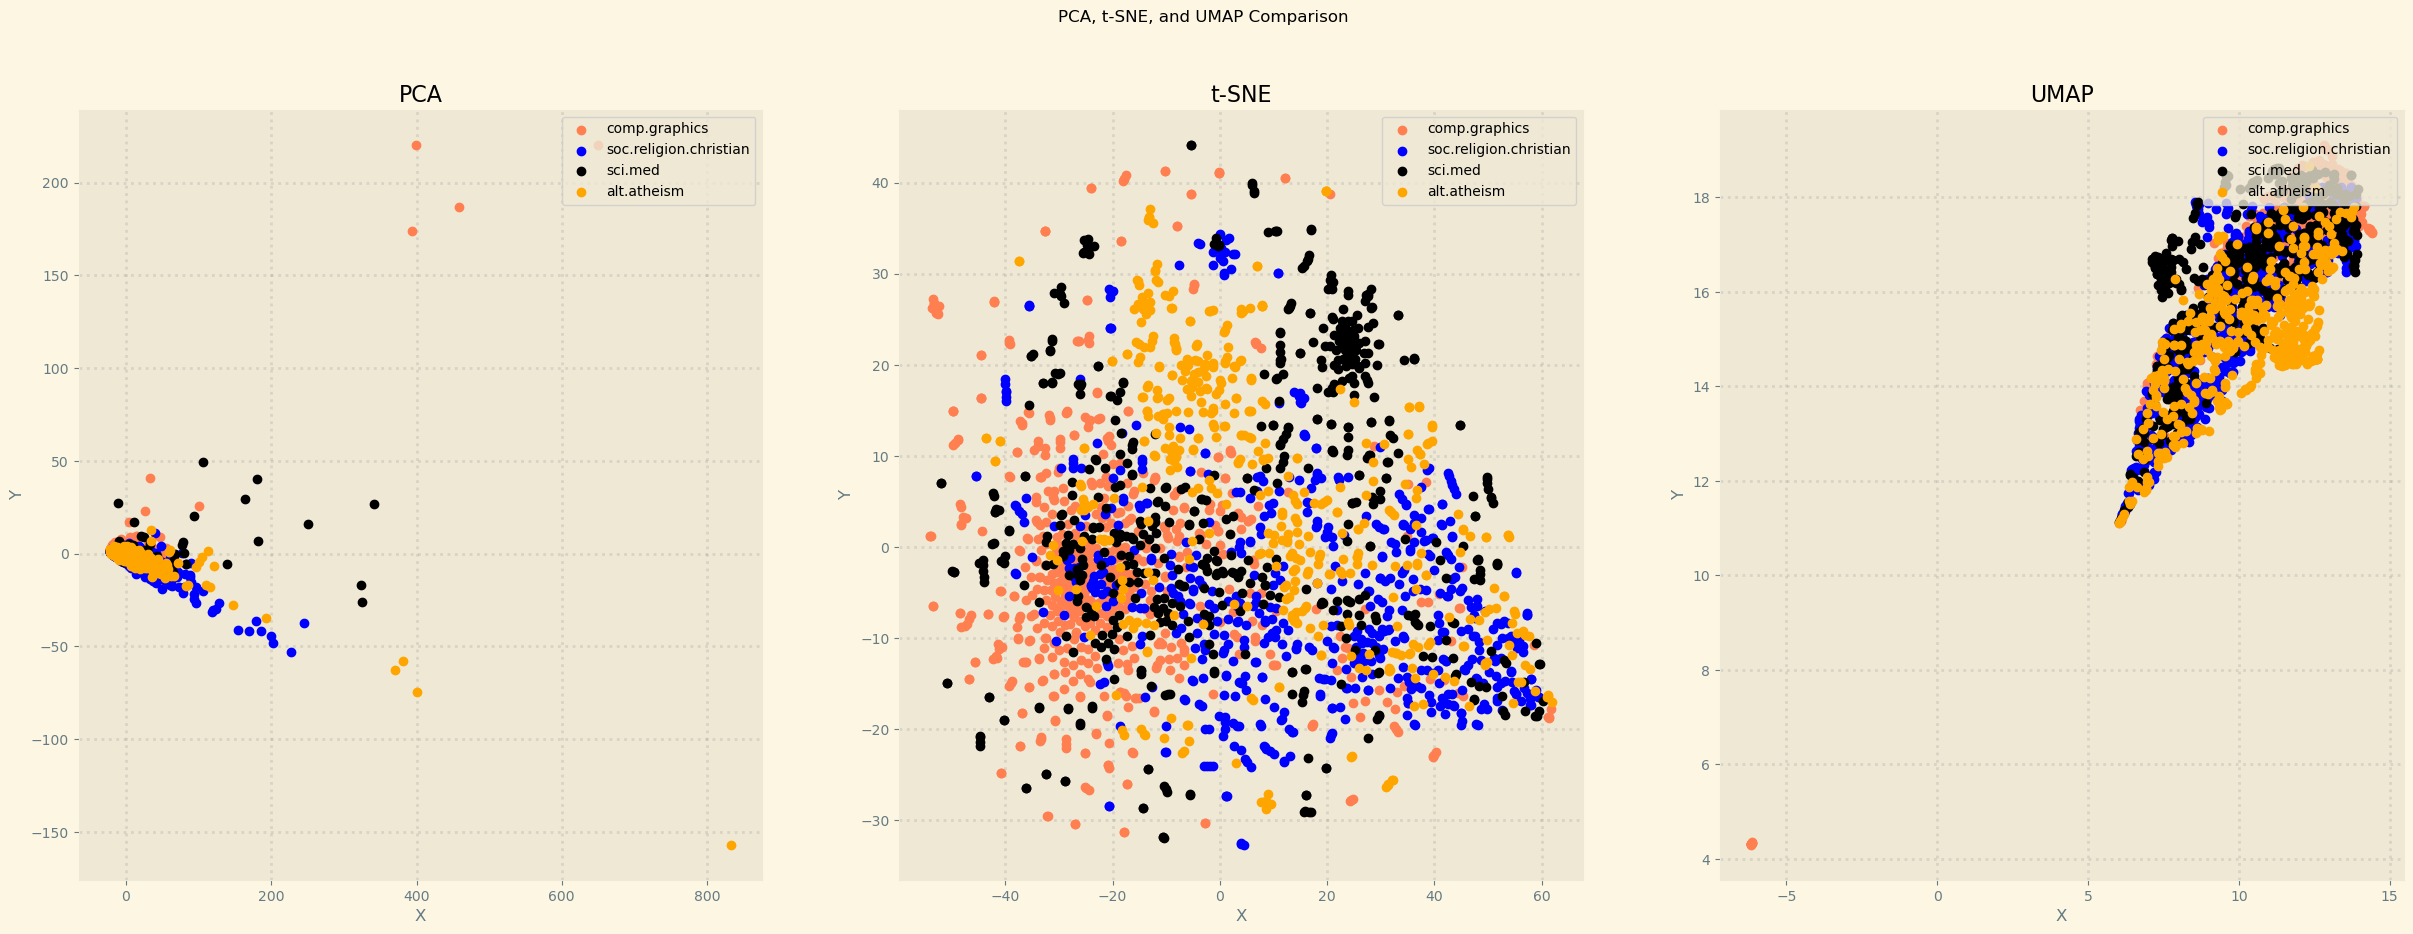

In [137]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
plt.show()

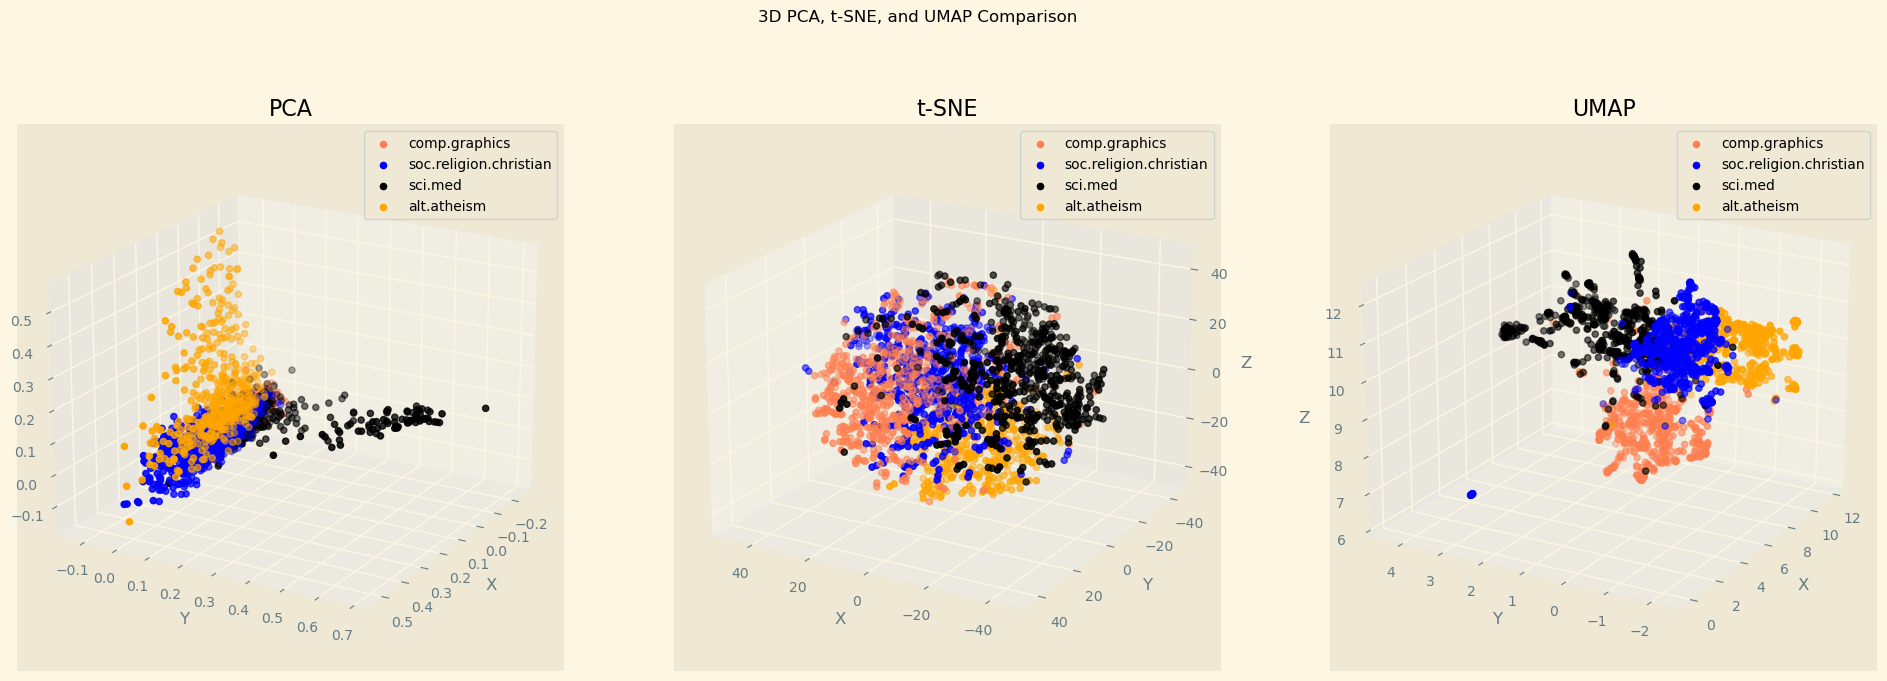

In [144]:
# exercise 18:  Please try to reduce the dimension to 3, and plot the result using 3-D plot. 
# Use at least 3 different angle (camera position) to check your result and describe what you found.
# Hint : you can refer to Axes3D in the documentation.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.feature_extraction.text import TfidfVectorizer

# 假設 X['text'] 包含需要處理的文字內容
# Step 1: 過濾出文字欄位並確認資料類型
X_text = X['text'].dropna()          # 刪除任何 NaN 值
X_text = X_text.astype(str)           # 確保所有內容為字串型別

# Step 2: 使用 TfidfVectorizer 將文字向量化
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_text)

# Step 3: 將向量化資料降維至 3 維
X_pca_aug = PCA(n_components=3).fit_transform(X_vectorized.toarray())
X_tsne_aug = TSNE(n_components=3).fit_transform(X_vectorized.toarray())
X_umap_aug = umap.UMAP(n_components=3).fit_transform(X_vectorized.toarray())

# 設定顏色和類別名稱
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# 創建 3D 散佈圖
fig = plt.figure(figsize=(24, 8))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison')

# 定義一個 3D 散點圖繪製函數
def plot_3d_scatter(ax, X_reduced, title, angle):
    for c, category in zip(col, categories):
        mask = (X['category_name'] == category)
        xs = X_reduced[mask, 0]
        ys = X_reduced[mask, 1]
        zs = X_reduced[mask, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.view_init(elev=20, azim=angle)  # 設置視角
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Step 4: 創建 3D 散佈圖，並從不同角度觀察
angles = [30, 120, 210]  # 設置三個不同的視角
X_reductions = [X_pca_aug, X_tsne_aug, X_umap_aug]
titles = ['PCA', 't-SNE', 'UMAP']

for i, (X_reduced, title) in enumerate(zip(X_reductions, titles)):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    plot_3d_scatter(ax, X_reduced, title, angles[i])

plt.show()


In [145]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

X['bin_category'] = mlb.transform(X['category']).tolist()

In [147]:
# exercise 19:  Try to generate the binarization using the category_name column instead. Does it work?

# my ans:

# 使用 category_name 欄位進行二值化
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])  # 使用 'category_name' 欄位

# 將二值化結果新增到新欄位 bin_category
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [148]:
X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   

                                      tokenized_text  bin_category  
0  {University,, utility), application/PD, (Micha...  [0, 1, 0, 0]  
1  {Hi,, else, B., domain, cell, bounded, I, Univ...  [0, 1, 0, 0]  
2  {lot,, boss, already, preserving, closing,, va...  [0, 0, 0, 1]  
3  {concerning, der, about, church-state(governme...  [0, 0, 0, 1]  
4  {his, (stanly), article, many, I, Christ's, yo...  [0, 0, 0, 1]

In [154]:
# 作業題目四: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

# 我認為可以減少使用toarray() (因為會消耗內存)，同時若資料集中包含許多不同的單詞，可以嘗試使用 max_features 限制詞彙表大小，以減少計算時間
# 對於文本前處理還可以: 去除無意義的數字、 進行詞感提取，或是將句子向量化

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re

nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# 自定義前處理函數
def preprocess_text(text):
    # 小寫轉換
    text = text.lower()
    # 去除標點符號
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 將文本切分為單詞
    words = text.split()
    
    # 詞幹提取
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # 詞形還原
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    
    return ' '.join(lemmatized_words)

# 對 X['text'] 進行處理
X['processed_text'] = X['text'].apply(preprocess_text)

# 顯示結果
print(X['processed_text'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       from sdcityacuk michael collier subject conver...
1       from animsukyedu aniruddha b deglurkar subject...
2       from djohnsoncsucsdedu darin johnson subject r...
3       from sletrugnl mm zwart subject cathol church ...
4       from stanlygrokcolumbiascncrcom stanli subject...
                              ...                        
2252    from roosoperonihelsinkifi christoph roo subje...
2253    from mhollowaicsunysbedu michael holloway subj...
2254    from sasghmtheseusunxsascom gari merril subjec...
2255    from dan wallach dwallachcsberkeleyedu subject...
2256    from dyerspdcccom steve dyer subject re is msg...
Name: processed_text, Length: 2257, dtype: object
